In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

import pandas as pd
import numpy as np
import json

import unicodedata
import re

import matplotlib.pyplot as plt

In [2]:
with open('tennis.json') as f:
    tennis = json.load(f)
records = pd.read_csv('task2.csv')

records.head()

,url,headline,player,score
0,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Henman overcomes rival Rusedski,TIM HENMAN,4-6 7-6 (8-6) 6-4
1,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Federer wins title in Rotterdam,ROGER FEDERER,5-7 7-5 7-6
2,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Safin slumps to shock Dubai loss,MARAT SAFIN,7-6 (7-2) 6-4
3,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Agassi into second round in Dubai,ANDRE AGASSI,6-4 7-5
4,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Roddick into San Jose final,ANDY RODDICK,7-6 (7-3) 6-3


In [3]:
#Number of unique players
play = set()
for p in records['player']:
    play.add(p)
    
len(play)

20

In [4]:
diff = []
count = 0
for score in records['score']:
    
    # Counter to find errors
    #print(count)
    if count == 29:
        diff.append(1)
        count += 1
        continue
    
    count += 1
    
    # Players 1 and 2 - to find the difference
    p1 = 0
    p2 = 0
    
    ind_list = score.split()
    for ind in ind_list:
        if not(ind[0] == '('):
            #print(ind[0] + ' ' + ind[2] + '\n' )
            p1 += int(ind[0])
            p2 += int(ind[2])
    diff_score = p2 - p1
    # Absolute value
    if diff_score < 0:
        diff_score *= -1
        
    diff.append(diff_score)
    
print(diff)

[1, 1, 3, 4, 4, 4, 5, 8, 8, 2, 4, 5, 8, 3, 7, 4, 4, 3, 2, 10, 6, 4, 8, 8, 0, 4, 5, 4, 1, 1, 5, 4, 9, 8, 5, 3, 6, 13, 7, 6, 6]


In [5]:
records['difference'] = diff

In [6]:
records

,url,headline,player,score,difference
0,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Henman overcomes rival Rusedski,TIM HENMAN,4-6 7-6 (8-6) 6-4,1
1,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Federer wins title in Rotterdam,ROGER FEDERER,5-7 7-5 7-6,1
2,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Safin slumps to shock Dubai loss,MARAT SAFIN,7-6 (7-2) 6-4,3
3,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Agassi into second round in Dubai,ANDRE AGASSI,6-4 7-5,4
4,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Roddick into San Jose final,ANDY RODDICK,7-6 (7-3) 6-3,4
5,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Henman hopes ended in Dubai rain,TIM HENMAN,7-5 6-4,4
6,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Injured Roddick quits in Memphis,ANDY RODDICK,7-5 6-3,5
7,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Young debut cut short by Ginepri,ROBBY GINEPRI,6-2 6-2,8
8,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Melzer shocks Agassi,ANDRE AGASSI,6-3 6-1,8
9,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Federer forced to dig deep,ROGER FEDERER,4-6 6-3 7-6,2


In [7]:
records.columns = ['url','headline','player','score','game_difference']

In [8]:
avg = {}
num = {}
for index, row in records.iterrows():
    if row['player'] in avg.keys():
        avg[row['player']] += row['game_difference']
        num[row['player']] += 1
    else:
        avg[row['player']] = row['game_difference']
        num[row['player']] = 1
        
print(avg)
print(num)

{'TIM HENMAN': 16, 'ROGER FEDERER': 12, 'MARAT SAFIN': 5, 'ANDRE AGASSI': 28, 'ANDY RODDICK': 20, 'ROBBY GINEPRI': 8, 'RAFAEL NADAL': 13, 'NICOLAS ALMAGRO': 3, 'GREG RUSEDSKI': 4, 'ROBIN SODERLING': 3, 'TAYLOR DENT': 10, 'PETER WESSELS': 6, 'LLEYTON HEWITT': 21, 'CARLOS MOYA': 23, 'GUILLERMO CORIA': 4, 'JOACHIM JOHANSSON': 5, 'DOMINIK HRBATY': 1, 'MARK PHILIPPOUSSIS': 5, 'GAEL MONFILS': 3, 'JUAN CARLOS FERRERO': 13}
{'TIM HENMAN': 4, 'ROGER FEDERER': 3, 'MARAT SAFIN': 2, 'ANDRE AGASSI': 4, 'ANDY RODDICK': 4, 'ROBBY GINEPRI': 1, 'RAFAEL NADAL': 2, 'NICOLAS ALMAGRO': 1, 'GREG RUSEDSKI': 1, 'ROBIN SODERLING': 1, 'TAYLOR DENT': 1, 'PETER WESSELS': 1, 'LLEYTON HEWITT': 5, 'CARLOS MOYA': 5, 'GUILLERMO CORIA': 1, 'JOACHIM JOHANSSON': 1, 'DOMINIK HRBATY': 1, 'MARK PHILIPPOUSSIS': 1, 'GAEL MONFILS': 1, 'JUAN CARLOS FERRERO': 1}


In [9]:
recs = []
for name in avg.keys():
    rec = []
    rec.append(name)
    
    # Average
    avg_diff = avg[name]/num[name]
    rec.append(avg_diff)
    recs.append(rec)
    
recs

[['TIM HENMAN', 4.0],
 ['ROGER FEDERER', 4.0],
 ['MARAT SAFIN', 2.5],
 ['ANDRE AGASSI', 7.0],
 ['ANDY RODDICK', 5.0],
 ['ROBBY GINEPRI', 8.0],
 ['RAFAEL NADAL', 6.5],
 ['NICOLAS ALMAGRO', 3.0],
 ['GREG RUSEDSKI', 4.0],
 ['ROBIN SODERLING', 3.0],
 ['TAYLOR DENT', 10.0],
 ['PETER WESSELS', 6.0],
 ['LLEYTON HEWITT', 4.2],
 ['CARLOS MOYA', 4.6],
 ['GUILLERMO CORIA', 4.0],
 ['JOACHIM JOHANSSON', 5.0],
 ['DOMINIK HRBATY', 1.0],
 ['MARK PHILIPPOUSSIS', 5.0],
 ['GAEL MONFILS', 3.0],
 ['JUAN CARLOS FERRERO', 13.0]]

In [10]:
recs_pd = pd.DataFrame(recs)

In [11]:
recs_pd.columns = ['player', 'avg_game_difference']

In [13]:
recs_pd.head()

,player,avg_game_difference
0,TIM HENMAN,4.0
1,ROGER FEDERER,4.0
2,MARAT SAFIN,2.5
3,ANDRE AGASSI,7.0
4,ANDY RODDICK,5.0


In [13]:
recs_pd.to_csv('task3.csv', index=False)

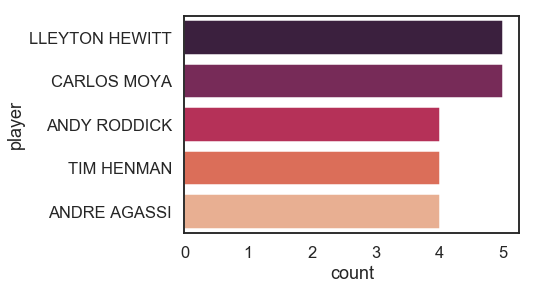

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.set(style="white", context="talk")
plot = sns.countplot(y='player', data=records, palette = 'rocket', order=records.player.value_counts().iloc[:5].index)
fig = plot.get_figure()

In [15]:
plot.set(xlabel='Number of Articles', ylabel='Player name', title='Frequency of Articles per player')

[Text(25.19999999999999, 0.5, 'Player name'),
 Text(0.5, 25.200000000000003, 'Number of Articles'),
 Text(0.5, 1.0, 'Frequency of Articles per player')]

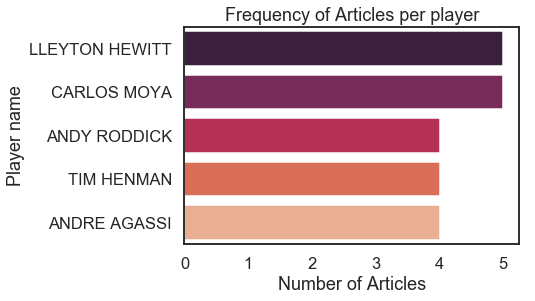

In [16]:
fig

In [17]:
fig.savefig('task4.png', bbox_inches='tight')

In [18]:
t3 = pd.read_csv('task3.csv')

In [19]:
t3

,player,avg_game_difference
0,TIM HENMAN,4.0
1,ROGER FEDERER,4.0
2,MARAT SAFIN,2.5
3,ANDRE AGASSI,7.0
4,ANDY RODDICK,5.0
5,ROBBY GINEPRI,8.0
6,RAFAEL NADAL,6.5
7,NICOLAS ALMAGRO,3.0
8,GREG RUSEDSKI,4.0
9,ROBIN SODERLING,3.0


In [20]:
winpct = []
for player in t3['player']:
    for star in tennis:
        if star['name'] == player:
            winpct.append(star['wonPct'])
            break
print(winpct)

['64.50%', '82.00%', '61.60%', '76.00%', '74.20%', '47.80%', '83.20%', '58.80%', '60.30%', '64.20%', '51.90%', '42.90%', '70.20%', '64.30%', '65.70%', '55.40%', '53.10%', '60.70%', '64.30%', '64.60%']


In [21]:
# Convert percentage to float
floatpct = []
for ele in winpct:
    ele = ele[:-1]
    ele = float(ele)
    floatpct.append(ele)
    
print(floatpct)

[64.5, 82.0, 61.6, 76.0, 74.2, 47.8, 83.2, 58.8, 60.3, 64.2, 51.9, 42.9, 70.2, 64.3, 65.7, 55.4, 53.1, 60.7, 64.3, 64.6]


In [22]:
t3['win_percentage'] = floatpct

In [23]:
last_name = []
for name in t3['player']:
    spl = name.split()
    last_name.append(spl[-1])
    
t3['last_name'] = last_name
t3

,player,avg_game_difference,win_percentage,last_name
0,TIM HENMAN,4.0,64.5,HENMAN
1,ROGER FEDERER,4.0,82.0,FEDERER
2,MARAT SAFIN,2.5,61.6,SAFIN
3,ANDRE AGASSI,7.0,76.0,AGASSI
4,ANDY RODDICK,5.0,74.2,RODDICK
5,ROBBY GINEPRI,8.0,47.8,GINEPRI
6,RAFAEL NADAL,6.5,83.2,NADAL
7,NICOLAS ALMAGRO,3.0,58.8,ALMAGRO
8,GREG RUSEDSKI,4.0,60.3,RUSEDSKI
9,ROBIN SODERLING,3.0,64.2,SODERLING


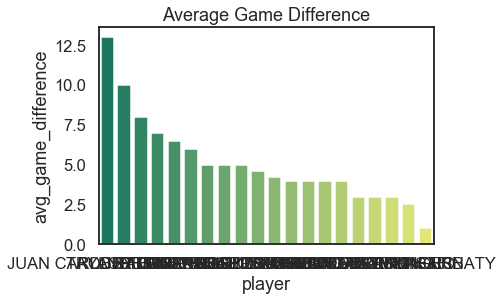

In [24]:
plt.title('Average Game Difference')
sns.barplot(x='player', y='avg_game_difference', data=t3, palette='summer', order=t3.sort_values(by='avg_game_difference', ascending=False).player)

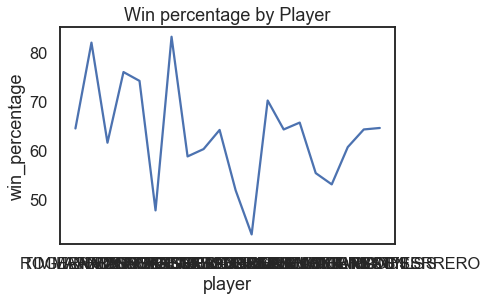

In [25]:
plt.title('Win percentage by Player')
sns.lineplot(x='player', y='win_percentage', data=t3, sort=False)

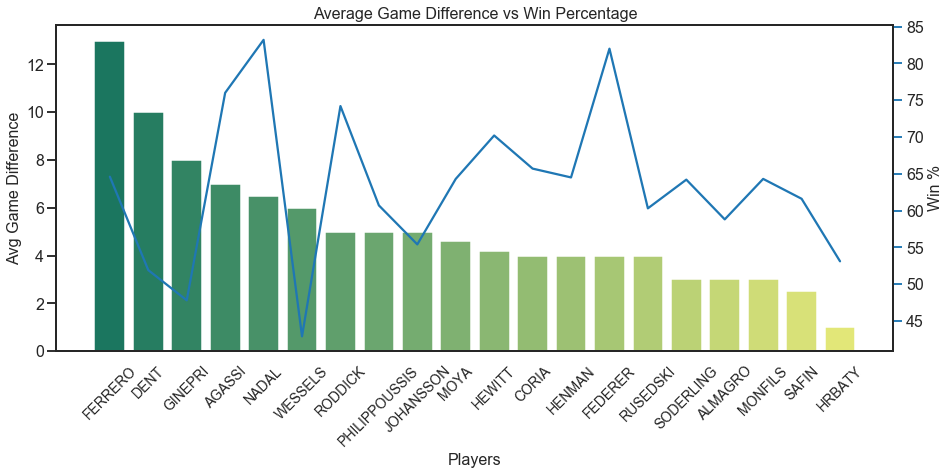

In [26]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'

#bar plot creation
ax1.set_title('Average Game Difference vs Win Percentage', fontsize=16)
ax1 = sns.barplot(x='last_name', y='avg_game_difference', data = t3, palette='summer',order=t3.sort_values(by='avg_game_difference', ascending=False).last_name)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.set_xlabel('Players', fontsize=16)
ax1.set_ylabel('Avg Game Difference', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

#line plot creation
ax2 = sns.lineplot(x='last_name', y='win_percentage', data = t3.sort_values(by='avg_game_difference', ascending=False), color=color, sort=False)
ax2.tick_params(axis='y', color=color,labelsize=16)
ax2.set_ylabel('Win %', fontsize=16)

#show plot
plt.show()

In [27]:
fig.savefig('task5.png', bbox_inches='tight')